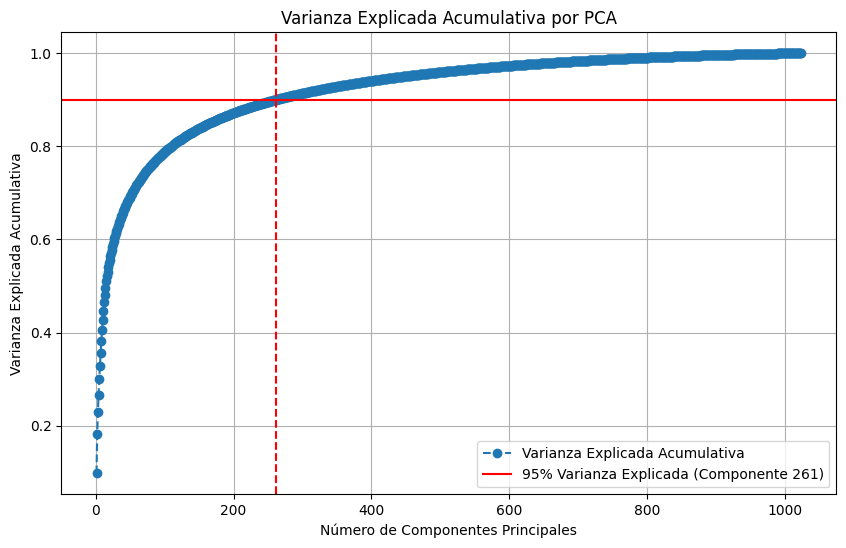

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle

def cargar_pkl(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

fl = "train_fixed"

file_path = 'video_features/vector_features/' + fl + '_features.pkl'
data = cargar_pkl(file_path)

feature_vectors = np.array([video['feature_vector'] for video in data])

# Escalar las características
scaler = StandardScaler()
feature_vectors_scaled = scaler.fit_transform(feature_vectors)

# Aplicar PCA
pca = PCA()
pca.fit(feature_vectors)

# Calcular la varianza explicada acumulativa
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número de componentes para explicar al menos el 95% de la varianza
threshold = 0.90
n_components = np.argmax(explained_variance >= threshold) + 1

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Varianza Explicada Acumulativa')
plt.axhline(y=threshold, color='r', linestyle='-', label=f'95% Varianza Explicada (Componente {n_components})')
plt.axvline(x=n_components, color='r', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por PCA')
plt.legend()
plt.grid(True)
plt.show()


Agglomerative Clustering Silhouette Score: 0.10689314200647251
Agglomerative Clustering Adjusted Rand Index (ARI): 0.25660224378776514
Agglomerative Clustering Adjusted Mutual Information (AMI): 0.6437812453712933


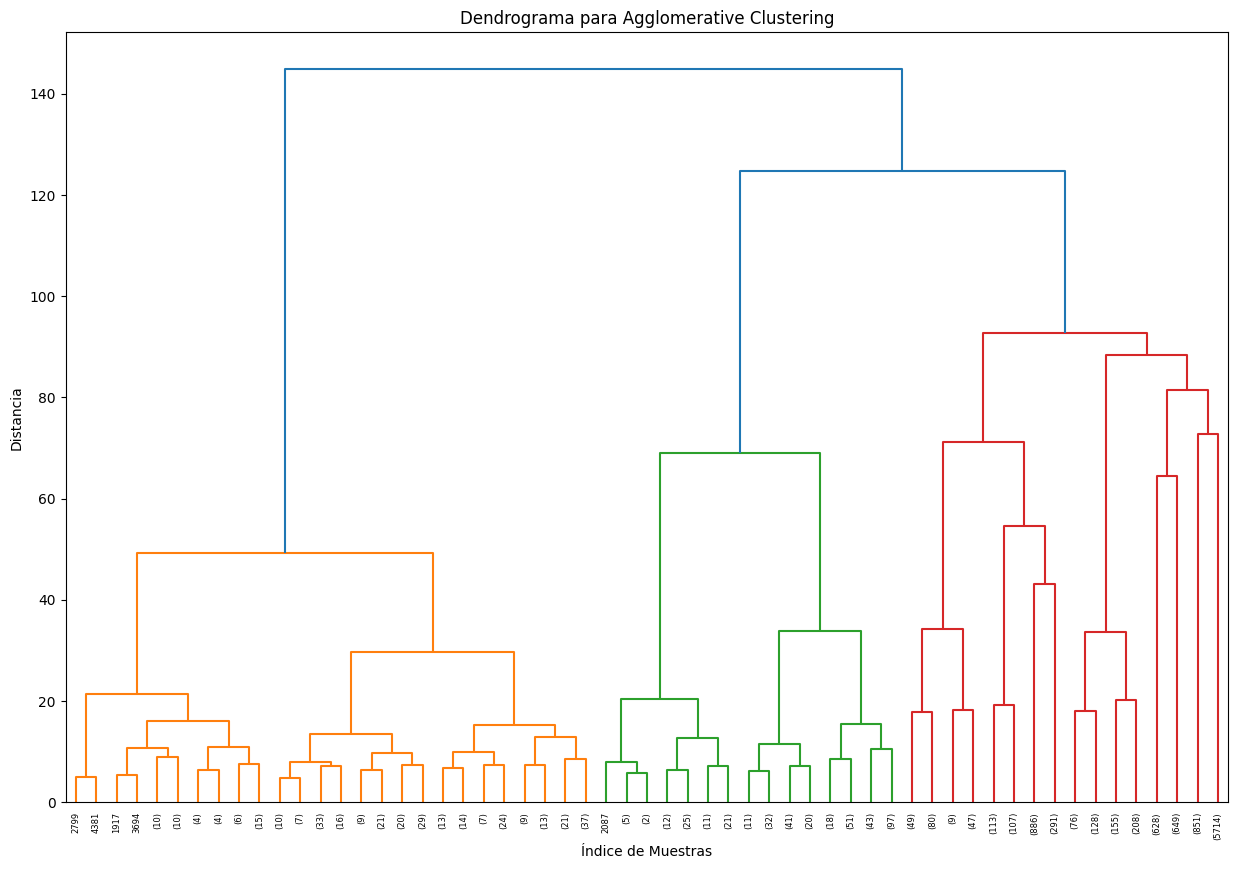

In [92]:

# Reducir la dimensionalidad de los datos
pca = PCA(n_components=n_components)
reduced_feature_vectors = pca.fit_transform(feature_vectors)

unique_labels = set([video['label'] for video in data])
n_clusters = len(unique_labels)

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder

# Aplicar Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(reduced_feature_vectors)

# Obtener las etiquetas verdaderas
true_labels = np.array([video['label'] for video in data])

# Codificar las etiquetas verdaderas
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Calcular las métricas
silhouette_avg_agg = silhouette_score(reduced_feature_vectors, agg_clusters)
rand_index_agg = adjusted_rand_score(true_labels_encoded, agg_clusters)
mutual_info_agg = adjusted_mutual_info_score(true_labels_encoded, agg_clusters)

# Mostrar las métricas
print(f'Agglomerative Clustering Silhouette Score: {silhouette_avg_agg}')
print(f'Agglomerative Clustering Adjusted Rand Index (ARI): {rand_index_agg}')
print(f'Agglomerative Clustering Adjusted Mutual Information (AMI): {mutual_info_agg}')

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Crear la matriz de enlaces
Z = linkage(reduced_feature_vectors, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrograma para Agglomerative Clustering')
plt.xlabel('Índice de Muestras')
plt.ylabel('Distancia')
plt.show()


In [93]:
val_data = cargar_pkl('video_features/vector_features/val_fixed_features.pkl')
# Obtener los feature vectors del conjunto de validación
val_feature_vectors = np.array([video['feature_vector'] for video in val_data])

# Aplicar la misma estandarización a los datos de validación
val_feature_vectors_scaled = scaler.transform(val_feature_vectors)

# Aplicar la misma reducción de dimensionalidad a los datos de validación
val_reduced_feature_vectors = pca.transform(val_feature_vectors_scaled)

# Aplicar Agglomerative Clustering a los datos de validación
val_agg_clusters = agg_clustering.fit_predict(val_reduced_feature_vectors)

# Calcular las métricas en los datos de validación
val_true_labels = np.array([video['label'] for video in val_data])
val_true_labels_encoded = label_encoder.transform(val_true_labels)

val_silhouette_avg_agg = silhouette_score(val_reduced_feature_vectors, val_agg_clusters)
val_rand_index_agg = adjusted_rand_score(val_true_labels_encoded, val_agg_clusters)
val_mutual_info_agg = adjusted_mutual_info_score(val_true_labels_encoded, val_agg_clusters)

# Mostrar las métricas en los datos de validación
print(f'Agglomerative Clustering Silhouette Score (Validación): {val_silhouette_avg_agg}')
print(f'Agglomerative Clustering Adjusted Rand Index (ARI) (Validación): {val_rand_index_agg}')
print(f'Agglomerative Clustering Adjusted Mutual Information (AMI) (Validación): {val_mutual_info_agg}')


Agglomerative Clustering Silhouette Score (Validación): 0.05883956130135877
Agglomerative Clustering Adjusted Rand Index (ARI) (Validación): 0.33747084452554355
Agglomerative Clustering Adjusted Mutual Information (AMI) (Validación): 0.6176316103195146
